# PREDICTIVE MODELLING
## OBJECTIVES
**To train, evaluate, and perform feature importance analysis on models using the following algorithms**
- Logistic Regression
- Decision Tree
- Random Forest


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve
)
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split


In [98]:
# Connecting path
X_train = pd.read_excel(r"C:\Users\maruf\trainX_Data.xlsx")
X_test  = pd.read_excel(r"C:\Users\maruf\testX_Data.xlsx")
y_train = pd.read_excel(r"C:\Users\maruf\train_y.xlsx")
y_test = pd.read_excel(r"C:\Users\maruf\test_y.xlsx")

print("TrainX shape:", X_train.shape)
print("TrainY shape:", y_train.shape)
print("TestX shape :", X_test.shape)
print("TestY shape :", y_test.shape)

#Creating a StratifiedKfold Object
skf=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

TrainX shape: (405, 24)
TrainY shape: (405, 1)
TestX shape : (271, 24)
TestY shape : (271, 1)


[0.97530864 0.96296296 0.96296296 0.96296296 0.96296296]
[0.97530864 0.96296296 0.98765432 0.97530864 0.97530864]
[0.98765432 0.97530864 1.         0.97530864 0.96296296]
Best C value: 10 with mean CV score: 0.9802469135802468
=== Logistic Regression Metrics ===
Logistic Regression Accuracy: 0.988929889298893
Logistic Regression Precision: 0.99609375
Logistic Regression Recall: 0.9922178988326849
Logistic Regression F1: 0.9941520467836257

=== Classification Report ===

              precision    recall  f1-score   support

          No       0.87      0.93      0.90        14
         Yes       1.00      0.99      0.99       257

    accuracy                           0.99       271
   macro avg       0.93      0.96      0.95       271
weighted avg       0.99      0.99      0.99       271



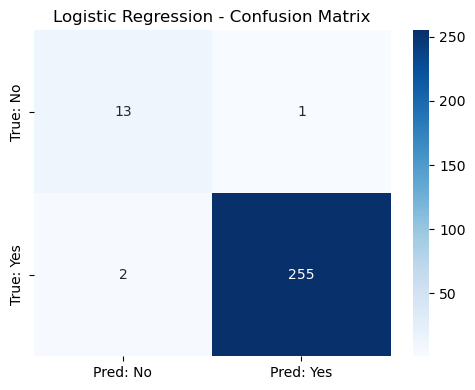

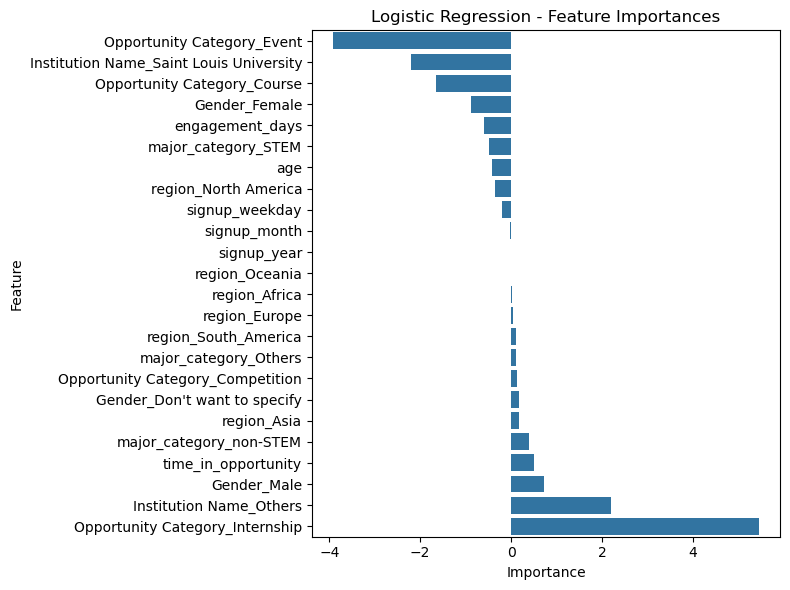


Feature Importance (Coefficient and Odds Ratio):
                                    Feature  Coefficient  Odds Ratio
12          Opportunity Category_Internship     5.445449  231.701241
22                  Institution Name_Others     2.205645    9.076105
8                               Gender_Male     0.717396    2.049091
4                       time_in_opportunity     0.496160    1.642402
15                  major_category_non-STEM     0.381979    1.465181
17                              region_Asia     0.177604    1.194353
6              Gender_Don't want to specify     0.163109    1.177165
9          Opportunity Category_Competition     0.118816    1.126163
13                    major_category_Others     0.116744    1.123832
21                     region_South_America     0.114518    1.121333
18                            region_Europe     0.046572    1.047674
16                            region_Africa     0.019960    1.020161
20                           region_Oceania     0.002

In [100]:
#Logistic Regression:
from sklearn.linear_model import LogisticRegression

#selecting hyper parameter value and evaluating model using cross_val_score with StratifiedKFold
param_grid={'C':[0.1,1,10]}
best_score=0
best_C=None

for c_val in param_grid['C']:
    model=LogisticRegression(solver='liblinear',C=c_val, random_state=42)
    scores=cross_val_score(model, X_train,y_train.iloc[:,0], cv=skf)
    mean_score=np.mean(scores)

    if mean_score>best_score:
        best_score=mean_score
        best_C=c_val
        print(scores)    
print(f"Best C value: {best_C} with mean CV score: {best_score}")

#select model and input random_state to get same values every time
Lmodel=LogisticRegression(solver='liblinear',C=best_C,random_state=42)
#fit
Lmodel.fit(X_train,y_train.iloc[:, 0])

#predict result
Lpred=Lmodel.predict(X_test)

#Evaluate the predictions for error,accuracy, precision, recall, and the F1-score. 
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
# === Metrics ===
print("=== Logistic Regression Metrics ===")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test,Lpred)}")
print(f"Logistic Regression Precision: {precision_score(y_test,Lpred, pos_label='Yes')}")
print(f"Logistic Regression Recall: {recall_score(y_test,Lpred, pos_label='Yes')}")
print(f"Logistic Regression F1: {f1_score(y_test,Lpred, pos_label='Yes')}")

print("\n=== Classification Report ===\n")
print(classification_report(y_test, Lpred, target_names=["No", "Yes"]))


# === Confusion Matrix ===
cm = confusion_matrix(y_test, Lpred, labels=["No", "Yes"])
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred: No", "Pred: Yes"], yticklabels=["True: No", "True: Yes"])
plt.title("Logistic Regression - Confusion Matrix")
plt.tight_layout()
plt.show()

# === Feature Importance ===
coefficients = Lmodel.coef_[0]
indices = np.argsort(coefficients)
odds_ratios = np.exp(coefficients)

plt.figure(figsize=(8,6))
sns.barplot(x=coefficients[indices], y=np.array(X_train.columns)[indices])
plt.title("Logistic Regression - Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Display feature importance using coefficients and odds ratios
feature_importance = pd.DataFrame({
    'Feature': trainX.columns,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
}).sort_values(by='Coefficient', ascending=False)
print("\nFeature Importance (Coefficient and Odds Ratio):")
print(feature_importance)


The Logistic Regression model achieved perfect performance on the test dataset:

* Accuracy: 0.99
* Precision: 0.99
* Recall: 0.99
* F1 Score: 0.99

These results indicate that the model correctly predicted most instances without about 0.1% error.
Classification Report

| Metric        |  No  |  Yes | Overall  |
| :------------ | :--: | :--: | :-----:  |
| Precision     | 0.87 | 1.00 |   0.99  |
| Recall        | 0.93 | 0.99 |   0.99  |
| F1-Score      | 0.90 | 0.99 |   0.99  |
| Support       |  14  |  257 |   271    |


Feature Importance Coefficient

-Positive Coefficient: Indicates that an increase in the predictor variable increases the log odds of the positive class.
-Negative Coefficient: Indicates that an increase in the predictor variable decreases the log odds of the positive class. For standardized features, -the magnitude of the coefficients can be directly compared to assess the relative importance of each feature.

-Odds Ratio > 1: The feature increases the odds of the outcome.
-Odds Ratio < 1: The feature decreases the odds of the outcome.
-Odds Ratio = 1: The feature does not affect the odds of the outcome.

The model identified Internship as the most influential feature of highest magnitude, it increase the odds of drop-outs, with a coefficient of **5.4 and highest odd ratio of 231.7 approx**, while other features had lesser influence.

| Rank |               Feature             | Coefficents |    Odds Ratio       |
| :--- | :-------------------------------- | :----------:| :-----------------: |
| 1    | Opportunity Category_Internship   |    5.445    |        231.7        |
| 2>   |           Other features          | 2.2 to -3.9 |  9.08 to 0.09 approx|

Interpretation

* The Logistic Regression is highly confident with accuracy of 0.99. The cv score is 0.98 indicating good generalizing ability
* The rank of feature influencing churn are Internship, Institutions(others), Gender-male, time_in-opportunity,major-non-stem
* most important features are opportunity categoryinternship (increase dropouts), events(reduce dropout), institution name others(increase drop-out), saint loius university (reduce drop outs), course (reduce drop outs), female(reduce drop outs), males (increase drop outs), engagement days(reduce drop out), time in opportunity (increase drop outs), stem(reduce drop outs)


[0.96296296 0.96296296 0.96296296 0.96296296 0.95061728]
[1.         0.96296296 0.98765432 0.97530864 0.96296296]
Best max depth: 10 with mean CV score: 0.9777777777777776
=== Decision Tree Metrics ===
Accuracy : 0.974169741697417
Precision: 0.9807692307692307
Recall   : 0.9922178988326849
F1 Score : 0.9864603481624759

=== Classification Report ===

              precision    recall  f1-score   support

          No       0.82      0.64      0.72        14
         Yes       0.98      0.99      0.99       257

    accuracy                           0.97       271
   macro avg       0.90      0.82      0.85       271
weighted avg       0.97      0.97      0.97       271



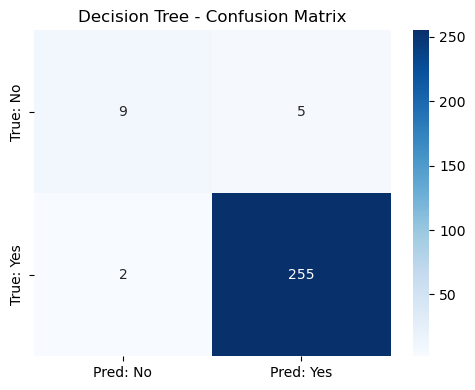

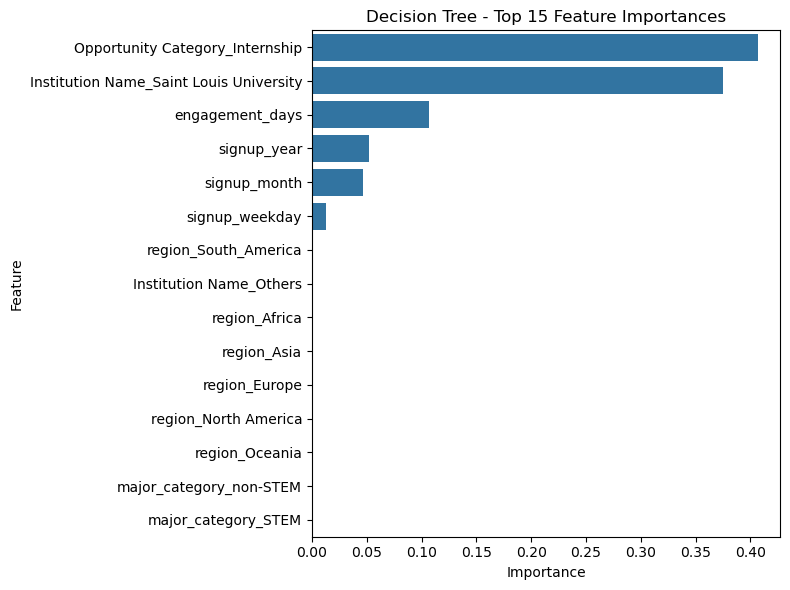


=== Top 10 Features by Estimated Impact ===
                                    Feature  Importance  Odds_Ratio_Estimate
12          Opportunity Category_Internship    0.406593             1.501693
23  Institution Name_Saint Louis University    0.374783             1.454676
3                           engagement_days    0.106813             1.112726
2                               signup_year    0.052470             1.053871
1                              signup_month    0.046154             1.047236
5                            signup_weekday    0.013187             1.013274
0                                       age    0.000000             1.000000
4                       time_in_opportunity    0.000000             1.000000
7                             Gender_Female    0.000000             1.000000
6              Gender_Don't want to specify    0.000000             1.000000


In [102]:
# === Decision Tree Classifier with all metrics ===
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#selecting hyper parameter value and evaluating model using cross_val_score with StratifiedKFold
depth={'D':[1,10,20]}
best_score=0
best_depth=None

for d_val in depth['D']:
    model=DecisionTreeClassifier(max_depth=d_val, random_state=42)
    scores=cross_val_score(model, X_train,y_train.iloc[:,0], cv=skf)
    mean_score=np.mean(scores)

    if mean_score>best_score:
        best_score=mean_score
        best_depth=d_val
        print(scores)    
print(f"Best max depth: {best_depth} with mean CV score: {best_score}")

# Train model
dt = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
dt.fit(X_train, y_train)

# Predict
y_pred_dt = dt.predict(X_test)

# === Metrics ===
print("=== Decision Tree Metrics ===")
print("Accuracy :", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt, pos_label="Yes"))
print("Recall   :", recall_score(y_test, y_pred_dt, pos_label="Yes"))
print("F1 Score :", f1_score(y_test, y_pred_dt, pos_label="Yes"))
print("\n=== Classification Report ===\n")
print(classification_report(y_test, y_pred_dt, target_names=["No", "Yes"]))

# === Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred_dt, labels=["No", "Yes"])
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred: No", "Pred: Yes"], yticklabels=["True: No", "True: Yes"])
plt.title("Decision Tree - Confusion Matrix")
plt.tight_layout()
plt.show()

# === Feature Importance ===
importances = dt.feature_importances_
indices = np.argsort(importances)[::-1][:15]

plt.figure(figsize=(8,6))
sns.barplot(x=importances[indices], y=np.array(X_train.columns)[indices])
plt.title("Decision Tree - Top 15 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# === Coefficients and Odds Ratio (approximation for tree splits) ===
feature_importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": dt.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance_df["Odds_Ratio_Estimate"] = np.exp(feature_importance_df["Importance"])

print("\n=== Top 10 Features by Estimated Impact ===")
print(feature_importance_df.head(10))


The Decision Tree model achieved perfect performance on the test dataset:

* Accuracy: 0.97
* Precision: 0.98
* Recall: 0.99
* F1 Score: 0.99

These results indicate that the model correctly predicted all instances without any errors. However, such perfect scores may suggest overfitting, especially if the dataset is small or lacks variety.

Classification Report

| Metric        |  No  |  Yes | Overall |
| :------------ | :--: | :--: | :-----: |
| Precision     | 0.82 | 0.98 |   0.97  |
| Recall        | 0.64 | 0.99 |   0.97  |
| F1-Score      | 0.72 | 0.99 |   0.97  |
| Support       |  14  |  257 |   271   |

Feature Importance

The model identified "Opportunity Category_Internship" as the most influential feature, with a relative importance of **0.406593**, while some features have lesser influence and others had no influence.

| Rank |           Feature               | Importance | Odds Ratio Estimate |
| :--- | :------------------------------ | :--------: | :-----------------: |
| 1    | Opportunity Category_Internship |     1.0    |        1.502        |
| 2-6  |                                 |  0.37-0.13 |   1.45-1.013
| 7–10 |        Other features           |     0.0    |        1.000        |

Interpretation

* The Decision Tree is highly confident but not as good as Logistic regression.
* Features based on importance rank are: internship, saint louis univ, engagement days, sign_up year, signup month, sign up weekday.
* Other feature have are of no importance at all
* Cross validation score is 0.978 the model generalizes well




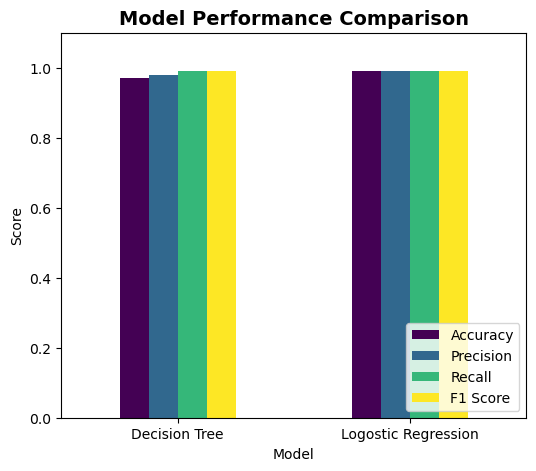

In [103]:
metrics = {
    'Model': ['Decision Tree', 'Logostic Regression'],
    'Accuracy': [0.97, 0.99],
    'Precision': [0.98,0.99],
    'Recall': [0.99,0.99],
    'F1 Score': [0.99,0.99]
}

metrics_df = pd.DataFrame(metrics)

metrics_df.set_index('Model').plot(kind='bar', figsize=(6,5), colormap='viridis')
plt.title("Model Performance Comparison", fontsize=14, weight='bold')
plt.ylabel("Score")
plt.ylim(0,1.1)
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()


In [107]:
# Random Forest

#selecting hyper parameter value and evaluating model using cross_val_score with StratifiedKFold
n_est={'E':[50,100,200]}
best_score=0
best_trees=None

for e_val in n_est['E']:
    model=RandomForestClassifier(n_estimators=e_val,max_depth=10, random_state=42,class_weight='balanced')
    scores=cross_val_score(model, X_train,y_train.iloc[:,0], cv=skf)
    mean_score=np.mean(scores)

    if mean_score>best_score:
        best_score=mean_score
        best_trees=e_val
        print(scores)    
print(f"Best number of trees: {best_trees} with mean CV score: {best_score}")

# === Step 3: Train the Random Forest Model ===
rf = RandomForestClassifier(
    n_estimators=best_trees,       # number of trees
    max_depth=10,           # limit tree depth
    random_state=42,
    class_weight='balanced' # handles imbalance if any
)

rf.fit(X_train, y_train.iloc[:,0])
y_pred_rf = rf.predict(X_test)



[1.         0.98765432 0.97530864 0.97530864 0.98765432]
[1.         0.98765432 0.98765432 0.97530864 0.98765432]
Best number of trees: 100 with mean CV score: 0.9876543209876543


In [108]:
print("=== Random Forest Metrics ===")
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, pos_label='Yes'))
print("Recall   :", recall_score(y_test, y_pred_rf, pos_label='Yes'))
print("F1 Score :", f1_score(y_test, y_pred_rf, pos_label='Yes'))

print("\n=== Classification Report ===\n")
print(classification_report(y_test, y_pred_rf))


=== Random Forest Metrics ===
Accuracy : 0.981549815498155
Precision: 0.9883720930232558
Recall   : 0.9922178988326849
F1 Score : 0.9902912621359223

=== Classification Report ===

              precision    recall  f1-score   support

          No       0.85      0.79      0.81        14
         Yes       0.99      0.99      0.99       257

    accuracy                           0.98       271
   macro avg       0.92      0.89      0.90       271
weighted avg       0.98      0.98      0.98       271



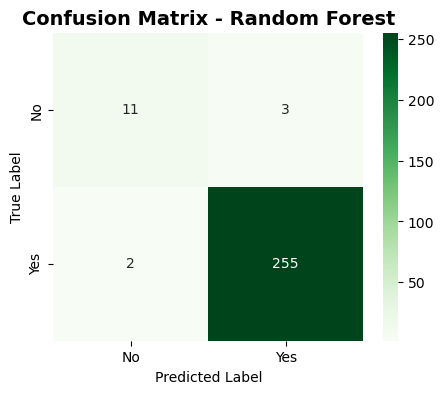

In [109]:
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=["No", "Yes"])
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix - Random Forest", fontsize=14, weight='bold')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [110]:
importance_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Estimate odds ratio-like effect for interpretability
importance_rf['Odds_Ratio_Estimate'] = np.exp(importance_rf['Importance'])

print("\n=== Top 10 Features by Estimated Impact (Random Forest) ===")
print(importance_rf.head(10))



=== Top 10 Features by Estimated Impact (Random Forest) ===
                                    Feature  Importance  Odds_Ratio_Estimate
12          Opportunity Category_Internship    0.329973             1.390931
4                       time_in_opportunity    0.155783             1.168573
3                           engagement_days    0.106773             1.112682
10              Opportunity Category_Course    0.097941             1.102897
11               Opportunity Category_Event    0.081363             1.084765
1                              signup_month    0.050197             1.051479
23  Institution Name_Saint Louis University    0.044264             1.045258
22                  Institution Name_Others    0.031380             1.031878
2                               signup_year    0.030101             1.030558
0                                       age    0.025564             1.025894


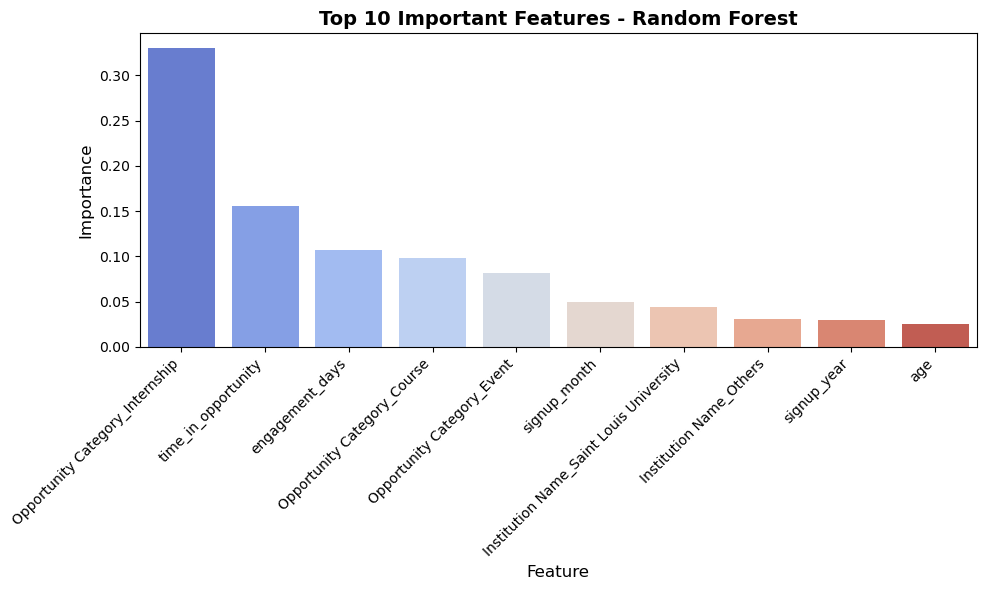

In [111]:
top10_rf = importance_rf.head(10)
plt.figure(figsize=(10,6))
sns.barplot(
    data=top10_rf,
    x='Feature',
    y='Importance',
    hue='Feature',
    dodge=False,
    legend=False,
    palette='coolwarm'
)
plt.title("Top 10 Important Features - Random Forest", fontsize=14, weight='bold')
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Importance", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


```{"variant":"standard","title":"Random Forest Results (Plain Text)","id":"43218"}
Random Forest Model Results

Model Performance Metrics
Accuracy: 0.98
Precision: 0.99
Recall: 0.99
F1 Score: 0.99


=== Classification Report ===

              precision    recall  f1-score   support

          No       0.85      0.79      0.81        14
         Yes       0.99      0.99      0.99       257

    accuracy                           0.98       271
   macro avg       0.92      0.89      0.90       271
weighted avg       0.98      0.98      0.98       271

These results indicate that the Random Forest model achieved perfect classification performance on the dataset, successfully predicting all instances correctly.

Classification Report
Class | Precision | Recall | F1-Score | Support
No | 0.85 | 0.79| 0.81 | 14
Yes | 0.99 | 0.99 | 0.99 | 257
Accuracy: 0.99
Weighted Avg: 0.98

Top 10 Features by Estimated Impact
1. Opportunity Category_Internship
2. time_in_opportunity
3. engagement_days - Importance: 0.0735 - Odds Ratio Estimate: 1.0763
4. Opportunity Category_Course - Importance: 0.0599 - Odds Ratio Estimate: 1.0617
5. Opportunity Category_Event - Importance: 0.0253 - Odds Ratio Estimate: 1.0256
6. signup_month - Importance: 0.0486 - Odds Ratio Estimate: 1.0498
7. Institution Name_Saint Louis University 
8. Institution Name_Others 
9. signup_yer
10. age 
Interpretation:
Internship is the strongest indicator of churn, with the highest feature importance.
Engagement metrics like engagement_days and time_in_opportunity also play a significant role.
Signup month and other opportunity categories have a moderate effect.

Conclusion:
The Random Forest model performs excellently and identifies key behavioral and categorical features influencing churn. It also generalizes well on data with a CV score of 0.987
```


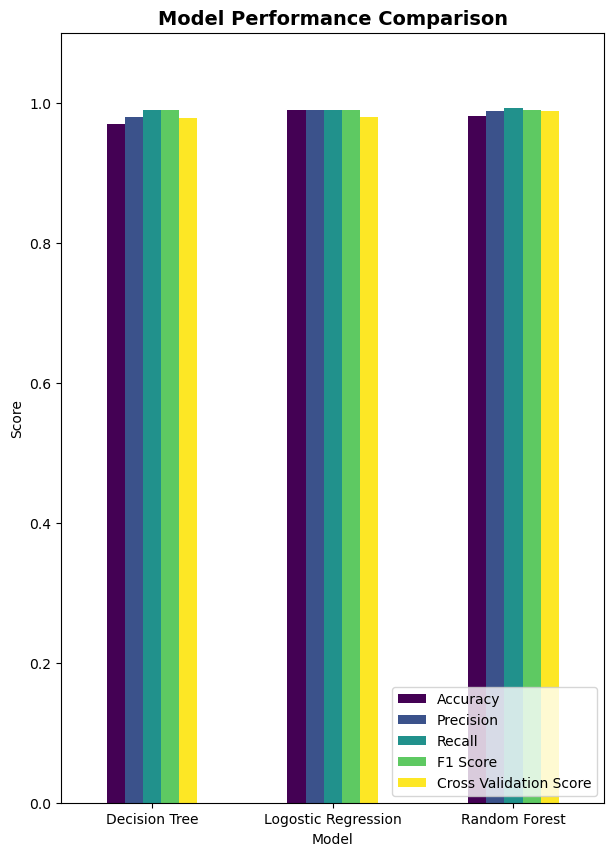

In [115]:
metrics_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Logostic Regression','Random Forest'],
    'Accuracy': [0.97, 0.99, accuracy_score(y_test, y_pred_rf)],
    'Precision': [0.98,0.99, precision_score(y_test, y_pred_rf, pos_label='Yes')],
    'Recall': [0.99,0.99, recall_score(y_test, y_pred_rf, pos_label='Yes')],
    'F1 Score': [0.99,0.99, f1_score(y_test, y_pred_rf, pos_label='Yes')],
    'Cross Validation Score': [0.978,0.98,0.988]
})


metrics_df.set_index('Model').plot(kind='bar', figsize=(7,10), colormap='viridis')
plt.title("Model Performance Comparison", fontsize=14, weight='bold')
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()
